# Template Matching

Template matching is the simplest form of object detection. It simply scans a larger image for a provided template by sliding the template target image across the larger image.

#### Various methods which we will use for object detection in Template Matching : 

![i](https://i.imgur.com/Tc8Lvu1.jpg)


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
full = cv2.imread('DATA/sammy.jpg')
full = cv2.cvtColor(full,cv2.COLOR_BGR2RGB)

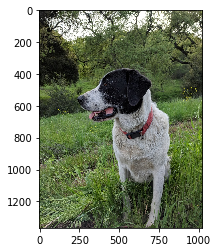

In [3]:
plt.imshow(full)

In [7]:
full.shape

(1367, 1025, 3)

In [4]:
face = cv2.imread('DATA/sammy_face.jpg')
face = cv2.cvtColor(face,cv2.COLOR_BGR2RGB)

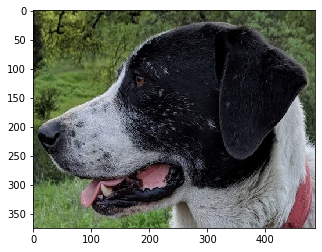

In [5]:
plt.imshow(face)

In [6]:
face.shape

(375, 486, 3)

### Demonstration of eval function

In [8]:
sum([1,2,3])

6

In [9]:
mystring = 'sum'

In [11]:
mystring([1,2,3]) # This does not make any sense

TypeError: 'str' object is not callable

In [12]:
eval(mystring)

<function sum(iterable, start=0, /)>

In [13]:
myfunc = eval(mystring)

In [14]:
myfunc([1,2,3])

6

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

In [15]:
# All the 6 methods for comparison in a list
# Note how we are using strings, later on we'll use the eval() function to convert to function
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

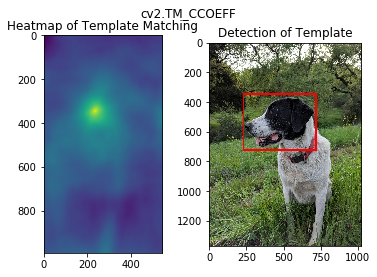

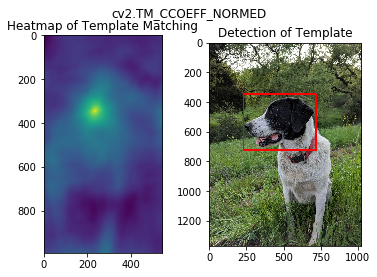

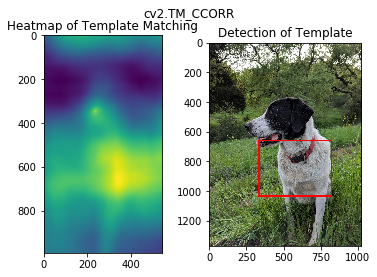

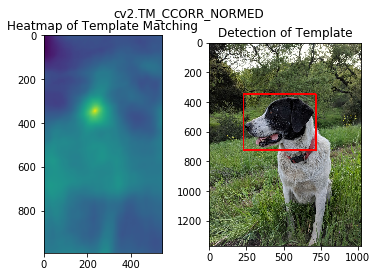

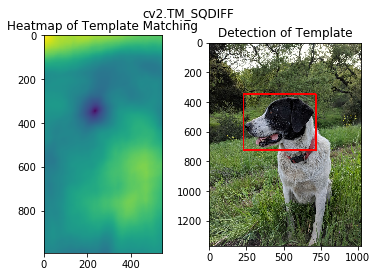

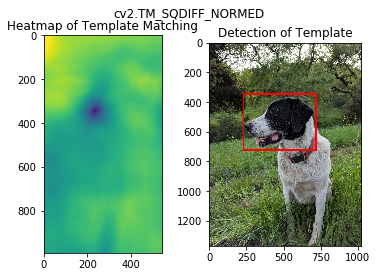

In [18]:
for m in methods:
    
    # Creating a copy of the original image
    full_copy = full.copy()
    
    method = eval(m)
    
    # Template matching
    res= cv2.matchTemplate(full_copy,face,method)
    
    min_val,max_val,min_loc,max_loc = cv2.minMaxLoc(res)
    
    if method in [cv2.TM_SQDIFF,cv2.TM_SQDIFF_NORMED]:
        
        top_left = min_loc
    else:
        
        top_left = max_loc
    
    height, width, channels = face.shape
    
    bottom_right = (top_left[0] + width, top_left[1]+height)
    
    cv2.rectangle(full_copy,top_left,bottom_right,(255,0,0),10)
    
    plt.subplot(121)
    plt.imshow(res)
    plt.title('Heatmap of Template Matching')
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('Detection of Template')
    plt.suptitle(m)
    plt.show()
    print('\n')
    print('\n')